# Unsupervised Learning

# Connectivity Based Clustering
 => Distance Based
    
# Centroid Based Clustering
 =>Represents each cluster by a single mean vector
    
# Distribution Based Clustering
 =>Modeled using statistical distribution
    
# Density Based Clustering
 =>Defines clusters as connected dense resions in the data space

# Elbow Method

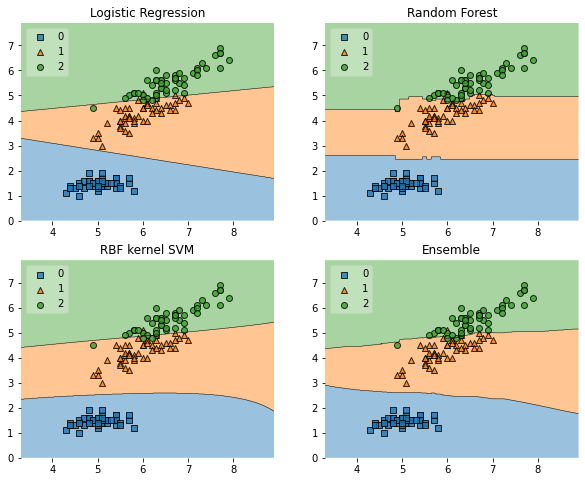

In [1]:
#dendograpm diagram

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

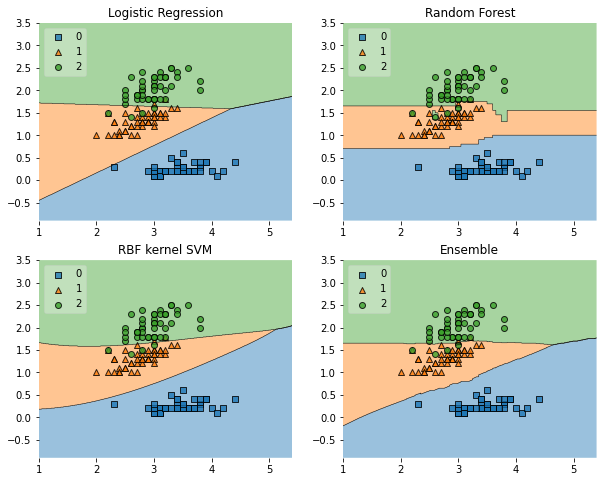

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[1, 3]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

# Ward's Agglometrative Hierarchical Clustering

. Agglometrative
   1. Bottom UP

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [11]:
from sklearn.datasets import make_blobs

In [28]:
X, y = make_blobs(n_samples=600, centers=3,
                 cluster_std=0.60, random_state=42)

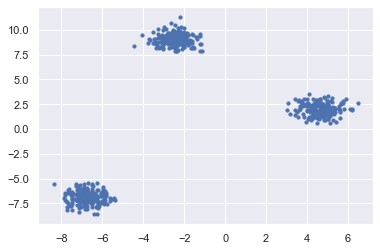

In [29]:
plt.scatter(X[:, 0], X[:,1], s=10)

In [30]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [31]:
distance = linkage(X, 'ward')

In [32]:
linkage?

## Dendogram

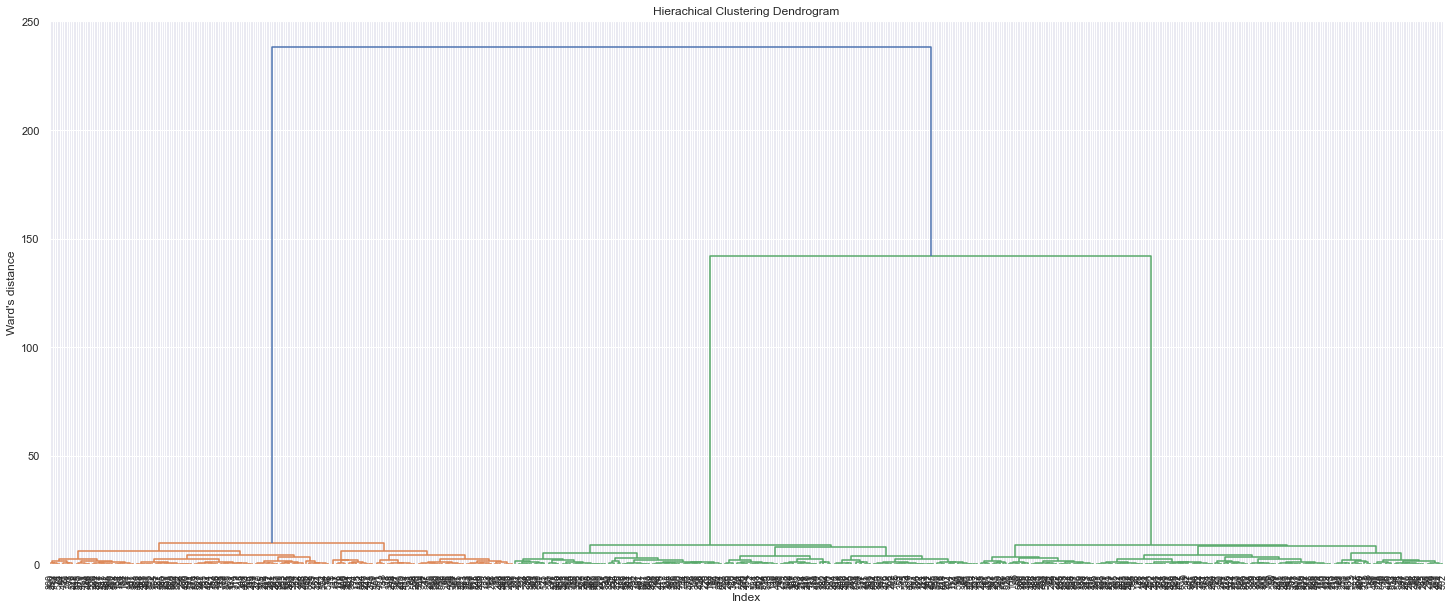

In [33]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);


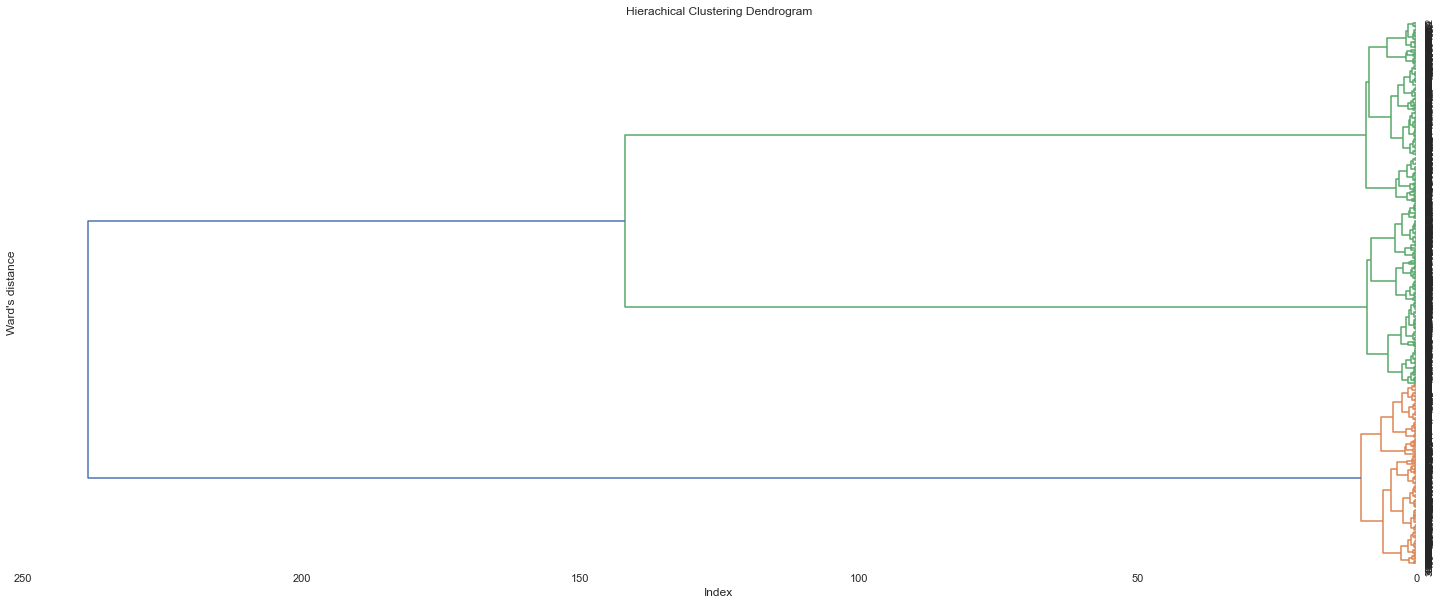

In [34]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index") 
plt.ylabel("Ward's distance")
dendrogram(distance,orientation="left",
           leaf_rotation=90.,
           leaf_font_size=9.,);


## Truncating Dendrogram

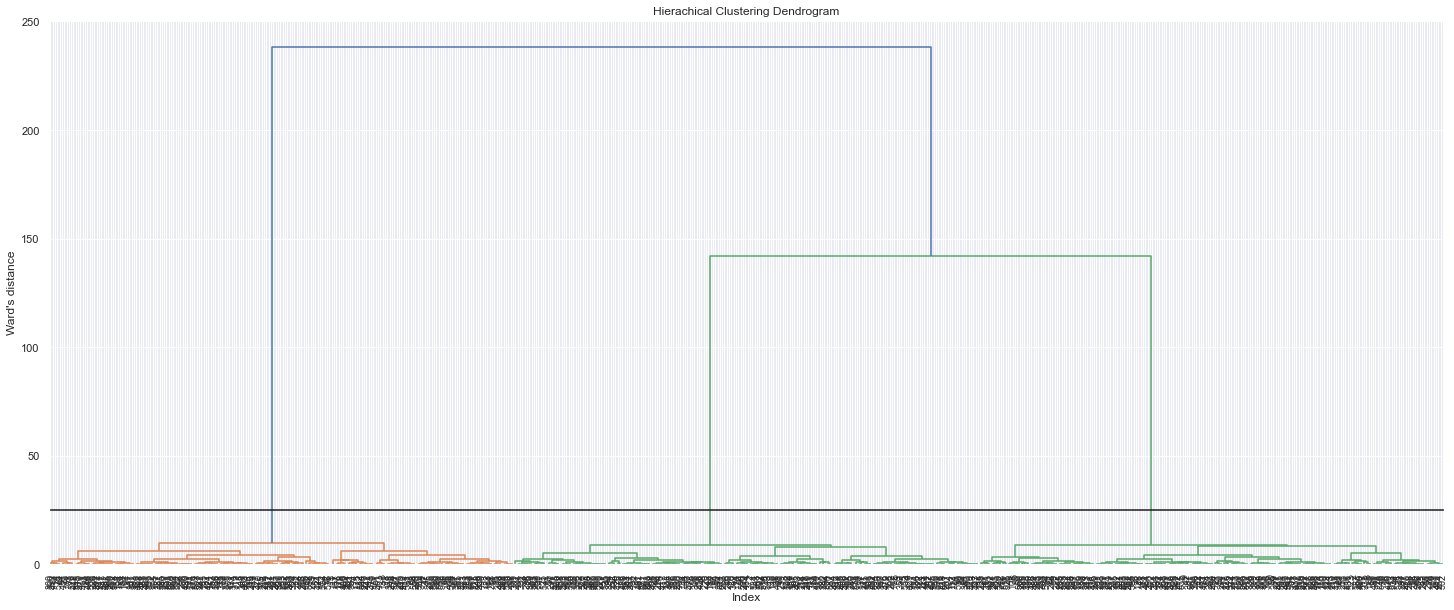

In [35]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(25, c='k');

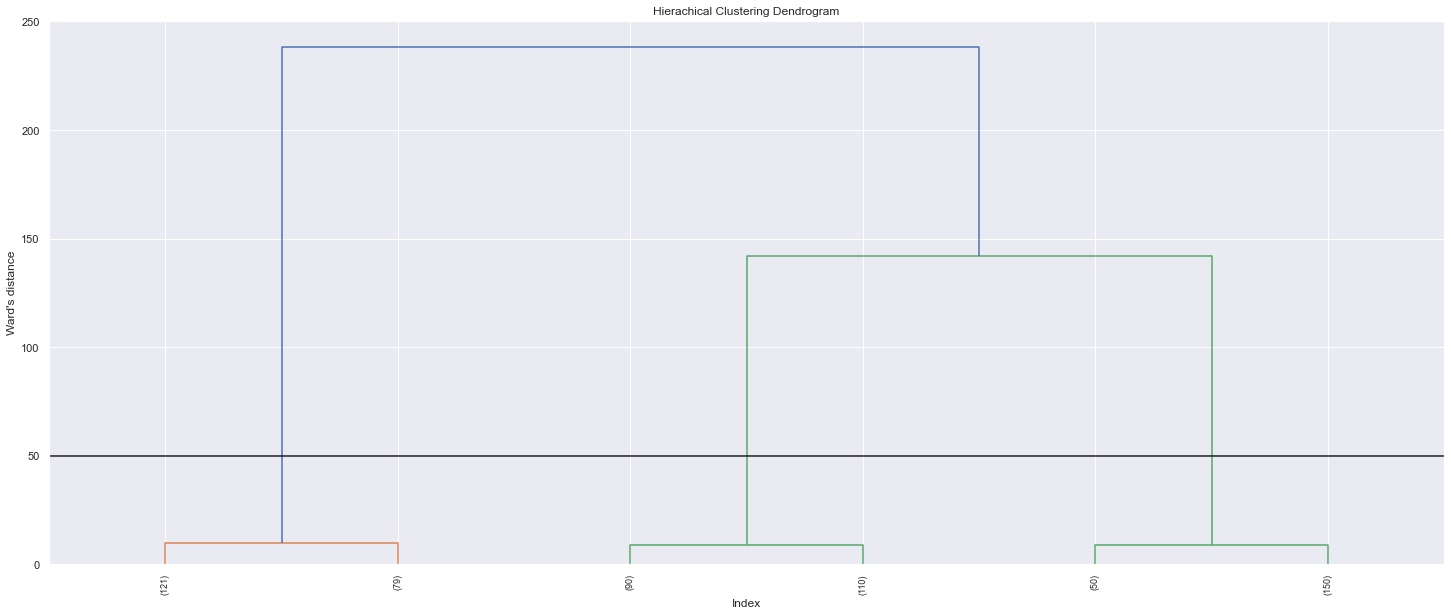

In [49]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,truncate_mode ='lastp',p=6,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(50, c='k');

In [50]:
from scipy.cluster.hierarchy import fcluster
max_d=150  
clusters = fcluster(distance, max_d, criterion='distance')
clusters

array([2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,

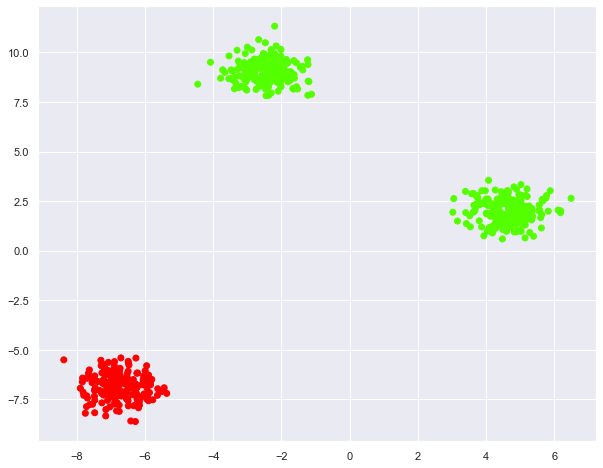

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism');

# By Clusters

In [52]:
k = 5
clusters = fcluster(distance, k, criterion = 'maxclust')

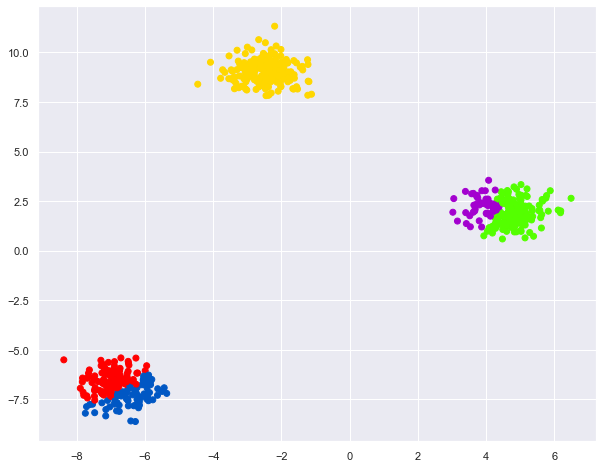

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')

# K Mean clustering


In [54]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [69]:
y_kmeans = kmeans.predict(X)

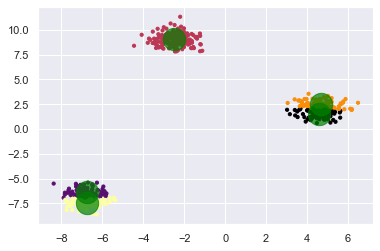

In [70]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=10, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=500, alpha=0.7)

<AxesSubplot:>

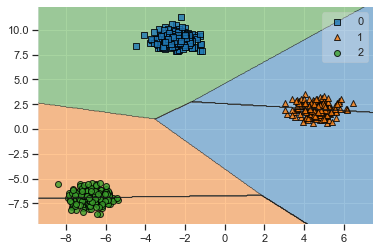

In [72]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y,clf=kmeans)

In [73]:
 kmeans.inertia_

317.1746360667045

In [80]:
sse_ = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k,kmeans.inertia_])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


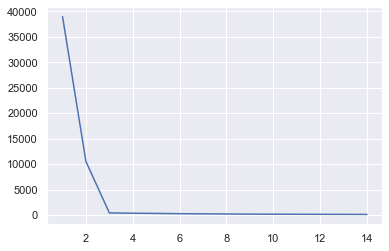

In [79]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

In [87]:
from sklearn.metrics import silhouette_score

In [88]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

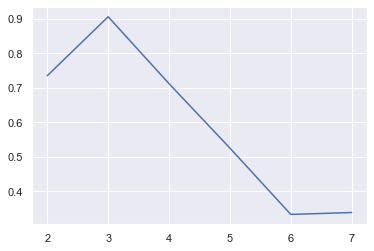

In [90]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
#Problem

# Mean Shift

In [102]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [103]:
from itertools import cycle

In [104]:
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [105]:
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=0.7548682518421252, bin_seeding=True)

In [108]:
cluster_centers = meanshift_model.cluster_centers_
cluster_centers

array([[-2.5837,  9.0488],
       [ 4.6909,  1.8203],
       [-6.8359, -6.7397],
       [-2.2002, 11.3259],
       [-8.3793, -5.5055]])

In [111]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data =', num_clusters)


Number of clusters in input data = 5


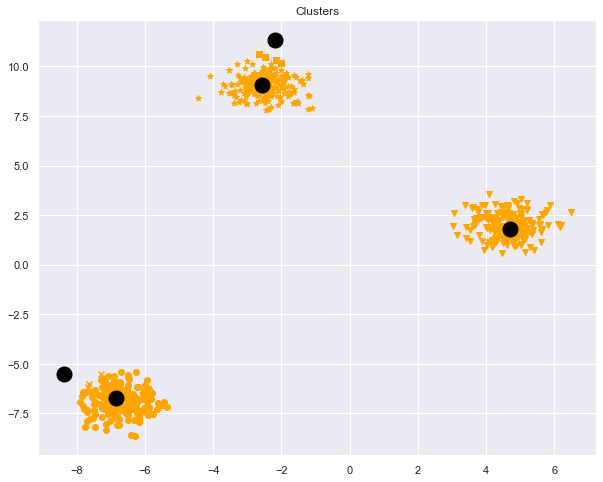

In [114]:
plt.figure(figsize=(10,8))
markers = '*vosx'
for i, marker in zip(range(num_clusters), markers):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='orange')
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o',  
             markerfacecolor='black', markeredgecolor='black',  
             markersize=15) 
plt.title('Clusters');